In [1]:
import pandas as pd
import igviz as ig
import networkx as nx

In [2]:
df = pd.read_csv('/mnt/d/blue_red.csv')

In [11]:
df = df[(~df['parent_process'].isnull()) & (~df['process'].isnull())]

In [12]:
G = nx.from_pandas_edgelist(df,source='parent_process',
                                   target='process',edge_attr=True,
                                   create_using=nx.DiGraph())

In [13]:
len(G.nodes())

82

In [14]:
df

,Unnamed: 0,process,process_name,parent_process,parent_process_name,parent_cmd_line,cmd_line,user
1312,2721,C:\Program Files (x86)\Plex\Plex Media Server\...,Plex Transcoder.exe,Plex Media Server.exe,NaN,NaN,NaN,NaN
1313,2722,C:\Windows\System32\conhost.exe,conhost.exe,Plex Transcoder.exe,NaN,NaN,NaN,NaN
1314,2723,C:\Program Files (x86)\Plex\Plex Media Server\...,Plex Transcoder.exe,Plex Media Server.exe,NaN,NaN,NaN,NaN
1315,2724,C:\Program Files (x86)\Plex\Plex Media Server\...,Plex Transcoder.exe,Plex Media Server.exe,NaN,NaN,NaN,NaN
2506,5014,C:\Program Files (x86)\Plex\Plex Media Server\...,Plex Transcoder.exe,Plex Media Server.exe,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
49768,99898,C:\Windows\System32\svchost.exe,svchost.exe,services.exe,NaN,NaN,NaN,NaN
49769,99899,C:\Windows\System32\svchost.exe,svchost.exe,services.exe,NaN,NaN,NaN,NaN
49770,99900,C:\Windows\System32\Defrag.exe,Defrag.exe,svchost.exe,NaN,NaN,NaN,NaN
49771,99901,C:\Windows\System32\conhost.exe,conhost.exe,Defrag.exe,NaN,NaN,NaN,NaN


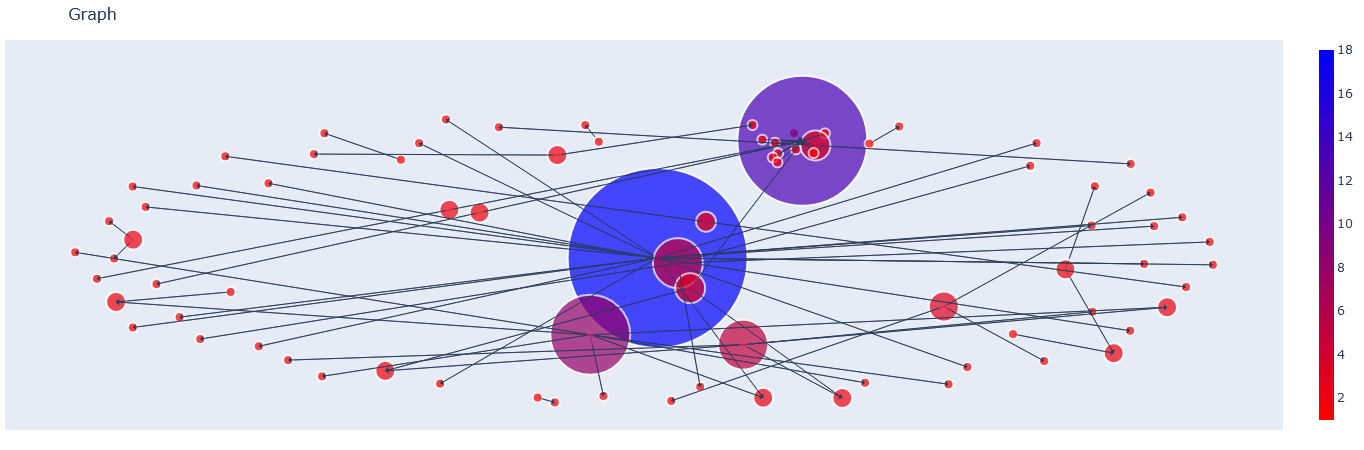

In [20]:
size = []
for node in G.nodes():
    size.append(G.degree(node) * 10)

ig.plot(
    G,
    size_method=size,
    layout="spring",
    colorscale="Bluered"
)